# SSN – analiza efektów uczenia sieci

### Roksana Jandura

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import random   

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Celem projektu jest analiza działania sztucznej sieci neuronowej (SSN) na przykładzie zadania aproksymacji funkcji nieliniowej. Projekt ma na celu zbadanie, w jaki sposób liczba neuronów w warstwie ukrytej, liczba warstw ukrytych, wielkość zbioru uczącego oraz długość procesu uczenia wpływają na zdolność sieci do odwzorowania zadanej funkcji oraz jej zdolność do generalizacji.

### Opis początkowego kodu:

Poniższy fragment kodu służy do **generowania danych do eksperymentów**. Została zdefiniowana nieliniowa funkcja celu: y = 0.5 * cos(0.2 * x^2) + 0.5 
oraz zestaw punktów uczących (x_siec, y_siec) – losowanych z ustalonego przedziału [a, b] z dodanym szumem normalnym. Dzięki temu przypadki uczące odzwierciedlają typowe dane rzeczywiste, które są obarczone zakłóceniami.

Wykres przedstawia:
- **Funkcję celu** – czarna linia (idealny przebieg funkcji, którą sieć ma się nauczyć),
- **Punkty uczące** – czerwone kropki (dane, na których trenowana będzie sieć, zawierające losowy szum).

Tak przygotowane dane pozwalają przetestować i ocenić, jak SSN radzi sobie z aproksymacją złożonych, nieliniowych zależności w obecności szumu.



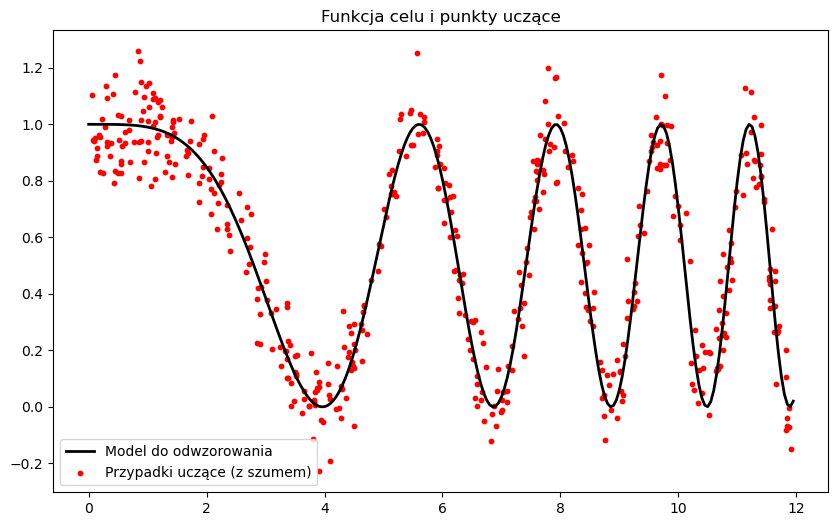

In [2]:
ile_danych = 500
a = 0
b = 12
np.random.seed(42)

x = np.arange(a, b, 0.05)
y = 0.5 * np.cos(0.2 * x**2) + 0.5

x_siec = np.random.uniform(a, b, ile_danych)
y_siec = 0.5 * np.cos(0.2 * x_siec**2) + 0.5 + 0.1 * np.random.randn(ile_danych)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k', label='Model do odwzorowania', linewidth=2)
plt.scatter(x_siec, y_siec, color='red', label='Przypadki uczące (z szumem)', s=10)
plt.legend()
plt.title('Funkcja celu i punkty uczące')
plt.show()


Poniższy fragment kodu realizuje dwa główne zadania:

- Podział danych na zbiory treningowy, walidacyjny i testowy

- Budowa i uczenie sieci neuronowej 
   Utworzono prostą sieć neuronową o architekturze:
   - **Warstwa ukryta**: 12 neuronów z aktywacją `tanh`,
   - **Warstwa wyjściowa**: 1 neuron z aktywacją liniową.
   Sieć została skompilowana z optymalizatorem Adam (learning rate = 0.01) i funkcją straty MSE.  
   Następnie model trenowany jest przez 100 epok, przy batch_size = 32. Wartość `verbose=0` sprawia, że w trakcie uczenia nie są wyświetlane szczegółowe komunikaty.

Tak przygotowany kod umożliwia ocenę efektywności wytrenowanej sieci na różnych etapach procesu uczenia.

In [4]:
X_train, X_tmp, y_train, y_tmp = train_test_split(x_siec, y_siec, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=1/3, random_state=42)


In [5]:
model = Sequential();
model.add(Dense(12, activation='tanh', input_shape=(1,)));
model.add(Dense(1, activation='linear'));

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse');

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
);


Poniższy fragment kodu służy do wizualizacji działania wytrenowanej sieci neuronowej w zadaniu aproksymacji funkcji.  
Kod generuje wykres przedstawiający:

- Model do odwzorowania (czarna linia): to rzeczywista funkcja, którą sieć ma się nauczyć.
- Przypadki uczące (czerwone punkty): to próbki uczące, które zawierają dodatkowo losowy szum.
- Aproksymacja sieci (czerwona linia): to wynik działania wytrenowanej sieci neuronowej na pełnym zakresie wejściowym.


8/8 [==============================] - 0s 2ms/step


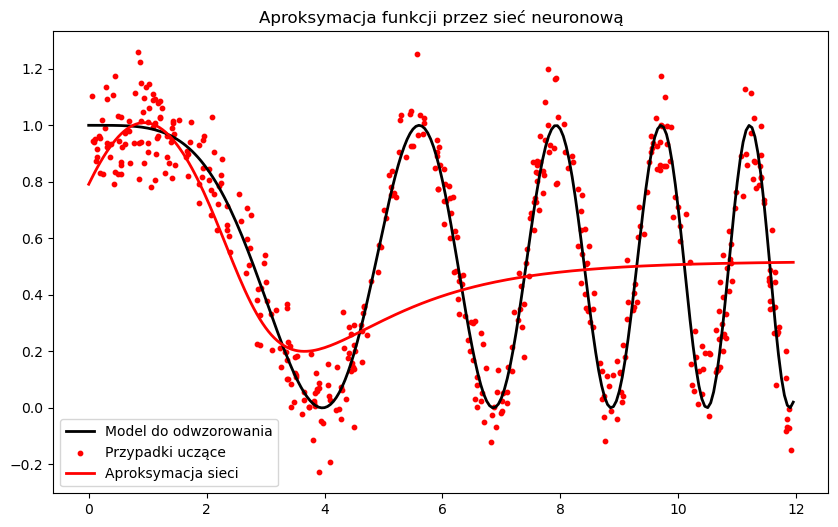

In [6]:
y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k', label='Model do odwzorowania', linewidth=2)
plt.scatter(x_siec, y_siec, color='red', label='Przypadki uczące', s=10)
plt.plot(x, y_pred, 'r', label='Aproksymacja sieci', linewidth=2)
plt.legend()
plt.title('Aproksymacja funkcji przez sieć neuronową')
plt.show()


**Wnioski z wykresu**

- Wytrenowana sieć neuronowa stara się przybliżyć docelową funkcję (czarna linia), jednak uzyskana aproksymacja (czerwona linia) jest dość gładka i nie odzwierciedla dokładnie złożoności rzeczywistej funkcji.
- Sieć nie jest w stanie uchwycić wszystkich niuansów funkcji, szczególnie w miejscach, gdzie występuje szybka zmienność lub duża liczba oscylacji.
- Prawdopodobną przyczyną takiego zachowania jest zbyt mała liczba neuronów w warstwie ukrytej, co ogranicza zdolność sieci do reprezentowania bardziej złożonych zależności (tzw. niedouczenie, underfitting).


Kod generuje wykres przedstawiający zmianę błędu MSE w trakcie kolejnych epok dla zbioru uczącego (`Train`) oraz walidacyjnego (`Validation`). Dzięki temu można zobaczyć, jak model uczy się z każdą kolejną epoką.


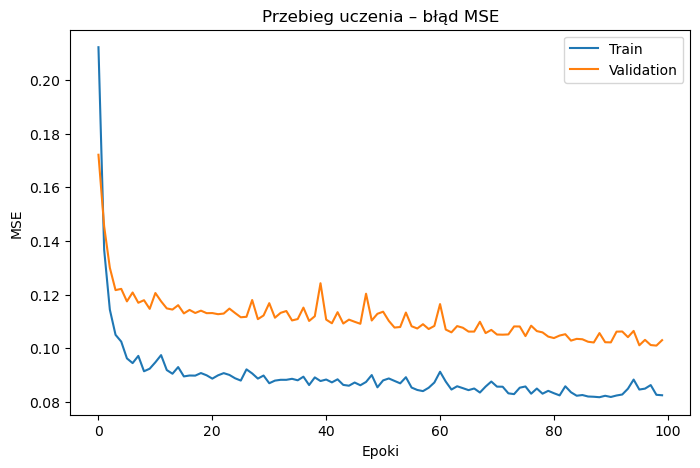

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoki')
plt.ylabel('MSE')
plt.legend()
plt.title('Przebieg uczenia – błąd MSE')
plt.show()


**Wnioski:**
- Błąd MSE na zbiorze uczącym i walidacyjnym szybko spada na początku uczenia, po czym stabilizuje się na stałym poziomie.
- Brak dużego rozjazdu między krzywymi sugeruje, że model nie przeuczył się i proces uczenia przebiega poprawnie.


### Wpływ mechanizmu Early Stopping na przebieg uczenia i jakość aproksymacji sieci neuronowej

W tej części eksperymentu badany jest wpływ zastosowania mechanizmu Early Stopping podczas uczenia sieci neuronowej. Sieć z jedną warstwą ukrytą (12 neuronów, aktywacja `tanh`) oraz wyjściem liniowym została trenowana przez maksymalnie 100 epok, z możliwością wcześniejszego zatrzymania, jeśli błąd walidacyjny nie poprawia się przez 10 kolejnych epok (`patience=10`). W trakcie każdej epoki zapisywany jest błąd MSE dla zbioru uczącego, walidacyjnego oraz testowego.


8/8 [==============================] - 0s 1ms/step


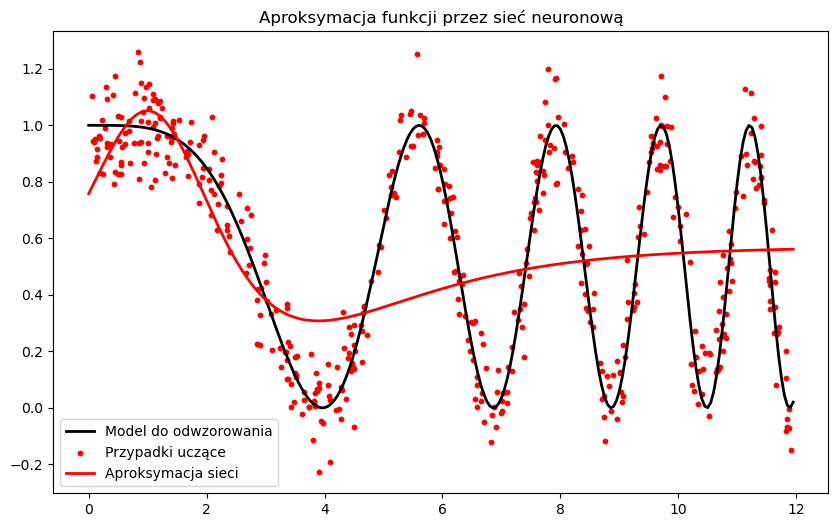

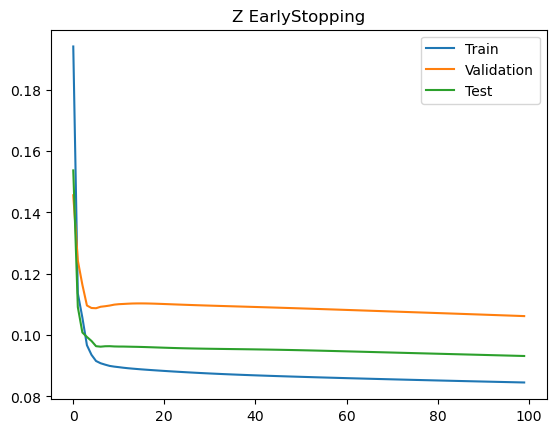

In [9]:
neurons = 12
n_epochs = 100

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential()
model.add(Dense(neurons, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

train_loss, val_loss, test_loss = [], [], []
for epoch in range(n_epochs):
    callbacks = [early_stop] if epoch == 0 else []
    h = model.fit(X_train, y_train, epochs=1, batch_size=32,
                  validation_data=(X_val, y_val), verbose=0,
                  callbacks=callbacks)
    train_loss.append(h.history['loss'][0])
    val_loss.append(h.history['val_loss'][0])
    y_test_pred = model.predict(X_test, verbose=0)
    test_loss.append(mean_squared_error(y_test, y_test_pred))
    if hasattr(model, 'stop_training') and model.stop_training:
        break

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k', label='Model do odwzorowania', linewidth=2)
plt.scatter(x_siec, y_siec, color='red', label='Przypadki uczące', s=10)
plt.plot(x, y_pred, 'r', label='Aproksymacja sieci', linewidth=2)
plt.legend()
plt.title('Aproksymacja funkcji przez sieć neuronową')
plt.show()


plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.plot(test_loss, label='Test')
plt.legend()
plt.title("Z EarlyStopping")
plt.show()

- **Wykres 1:**  
  Przedstawia aproksymację zadanej funkcji przez sieć neuronową. Widać, że mimo obecności szumu w danych uczących, sieć stara się przybliżyć docelową funkcję (czarna linia), jednak uzyskana aproksymacja (czerwona linia) jest dość gładka i nie odzwierciedla dokładnie złożoności rzeczywistej funkcji.

- **Wykres 2:**  
  Przebieg błędu MSE (uczący, walidacyjny, testowy) w trakcie uczenia z mechanizmem Early Stopping. Na wykresie obserwujemy:
    - Szybki spadek błędu w początkowej fazie uczenia.
    - Stabilizację i niewielkie różnice między krzywymi po kilku/kilkunastu epokach.
    - Dzięki Early Stopping unikamy przeuczenia (overfittingu), a proces uczenia jest zatrzymywany wtedy, gdy dalsze uczenie nie przynosi już istotnej poprawy na zbiorze walidacyjnym.

**Podsumowanie:**  
Zastosowanie Early Stopping pozwala na automatyczną kontrolę procesu uczenia i chroni sieć przed przeuczeniem. Pozwala to uzyskać model o lepszej zdolności generalizacji do nowych danych, co widać po zbliżonym poziomie błędu na zbiorach walidacyjnym i testowym.

### Wpływ liczby neuronów i liczby warstw ukrytych na zdolność sieci neuronowej do aproksymacji funkcji

**Opis działania funkcji:**

Funkcja compare_hidden_neurons pozwala na eksperymentalną analizę wpływu liczby neuronów oraz liczby warstw ukrytych na jakość aproksymacji realizowaną przez sieć neuronową typu MLP (Multi-Layer Perceptron).

Główne elementy funkcji:

- **Argumenty funkcji:**  
  Przyjmuje podzielone zbiory danych (`X_train`, `X_val`, `X_test`, itp.), parametry sieci (`neurons_list` – liczba neuronów, `n_hidden_layers` – liczba warstw ukrytych), liczbę epok (`n_epochs`), batch size, kolory do wykresów, a także dane do wizualizacji funkcji docelowej i punktów uczących (`x`, `y`, `x_siec`, `y_siec`).

- **Uczenie sieci:**  
  Dla każdej konfiguracji liczby neuronów (i warstw) budowana jest nowa sieć, która jest uczona w pętli przez określoną liczbę epok. Po każdej epoce zapisywane są wartości błędu MSE na zbiorze treningowym, walidacyjnym i testowym.

- **Wizualizacja:**  
  Dla każdej sieci rysowana jest:
  - Aproksymacja funkcji przez sieć na tle funkcji docelowej oraz punktów uczących (zbiorczy wykres).
  - Przebieg błędu uczenia (train), walidacji (validation) i testu (test) w kolejnych epokach, z zaznaczeniem epoki, w której osiągnięto najniższy błąd walidacyjny.

- **Zwracane wyniki:**  
  Funkcja zwraca listy przebiegów błędów dla wszystkich konfiguracji sieci, co pozwala na dalszą analizę lub automatyczne generowanie raportów.

**Cel funkcji:**  
Funkcja umożliwia kompleksowe porównanie wpływu liczby neuronów i warstw ukrytych na zdolność aproksymacji, przebieg uczenia oraz ryzyko przeuczenia sieci. Dzięki temu można dobrać odpowiednią architekturę dla konkretnego problemu.




In [10]:
def compare_hidden_neurons(
    X_train, y_train, X_val, y_val, X_test, y_test,
    x, y, x_siec, y_siec,
    neurons_list=[2, 4, 8, 12, 20, 50],
    n_hidden_layers=1,
    colors=['red', 'orange', 'green', 'blue', 'purple', 'brown'],
    n_epochs=100,
    batch_size=32,
    show=True
):
    history_loss = []
    history_val_loss = []
    history_test_loss = []

    # Wykres zbiorczy (aproksymacja)
    plt.figure(figsize=(12, 7))
    plt.plot(x, y, 'k', label='Funkcja do odwzorowania', linewidth=2)
    plt.scatter(x_siec, y_siec, color='gray', s=8, alpha=0.2, label='Punkty uczące')

    for n_neurons, color in zip(neurons_list, colors):
        model = Sequential()
        # Dowolna liczba warstw ukrytych
        for i in range(n_hidden_layers):
            if i == 0:
                model.add(Dense(n_neurons, activation='tanh', input_shape=(1,)))
            else:
                model.add(Dense(n_neurons, activation='tanh'))
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

        # pętla po epokach
        train_loss, val_loss, test_loss = [], [], []
        for epoch in range(n_epochs):
            h = model.fit(X_train, y_train, epochs=1, batch_size=batch_size, 
                          validation_data=(X_val, y_val), verbose=0)
            train_loss.append(h.history['loss'][0])
            val_loss.append(h.history['val_loss'][0])

            test_loss.append(model.evaluate(X_test, y_test, verbose=0))


        history_loss.append(train_loss)
        history_val_loss.append(val_loss)
        history_test_loss.append(test_loss)

        # Aproksymacja na zbiorczym wykresie
        y_pred = model.predict(x, verbose=0)
        plt.plot(x, y_pred, color=color, label=f'{n_neurons} neuronów')

    plt.legend()
    plt.title(f'Wpływ liczby neuronów i liczby warstw ({n_hidden_layers}) na aproksymację')
    plt.xlabel('x')
    plt.ylabel('y')
    if show:
        plt.show()

    # Wykresy przebiegu uczenia dla każdej liczby neuronów
    for i, n_neurons in enumerate(neurons_list):
        min_epoch = np.argmin(history_val_loss[i])
        min_val = history_val_loss[i][min_epoch]

        plt.figure(figsize=(8, 5))
        plt.plot(history_loss[i], label='Train')
        plt.plot(history_val_loss[i], label='Validation')
        plt.plot(history_test_loss[i], 'g', label='Test')
        plt.plot(min_epoch, min_val, 'go', markersize=10, label='Best Validation')
        plt.xlabel('Epoki')
        plt.ylabel('Mean Squared Error (MSE)')
        plt.title(f'Przebieg uczenia: {n_neurons} neuronów, {n_hidden_layers} warstw ukrytych')
        plt.legend()
        if show:
            plt.show()

    return history_loss, history_val_loss, history_test_loss


Wywołanie funkcji `compare_hidden_neurons` z parametrami `neurons_list=[4, 8, 12, 20, 50]` oraz jedną warstwą ukrytą (`n_hidden_layers=1`) umożliwia przeprowadzenie eksperymentu, w którym analizowany jest wpływ liczby neuronów w warstwie ukrytej na jakość aproksymacji zadanej funkcji przez sieć neuronową.

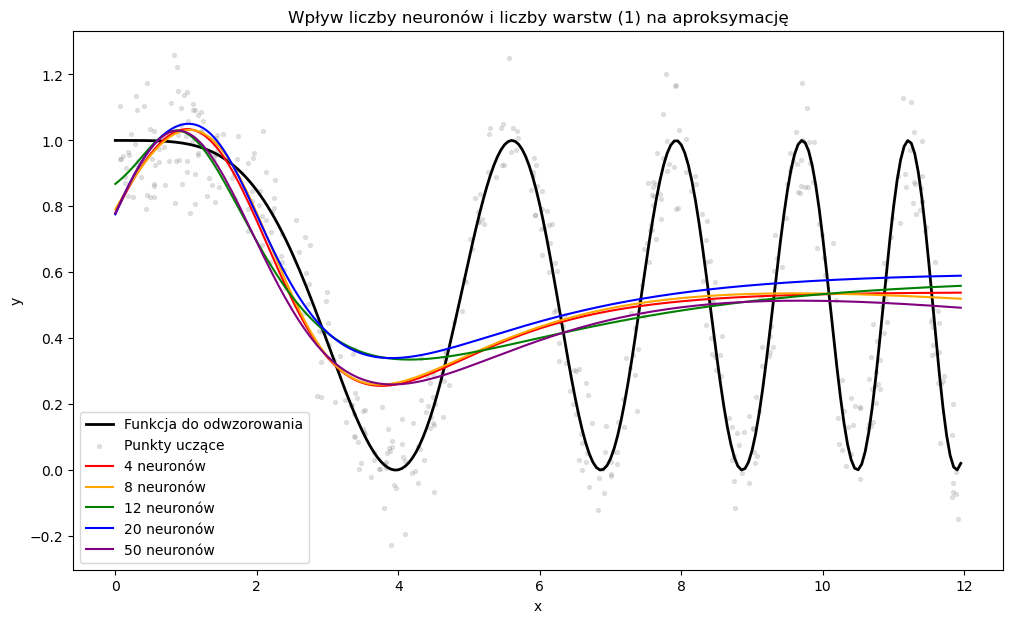

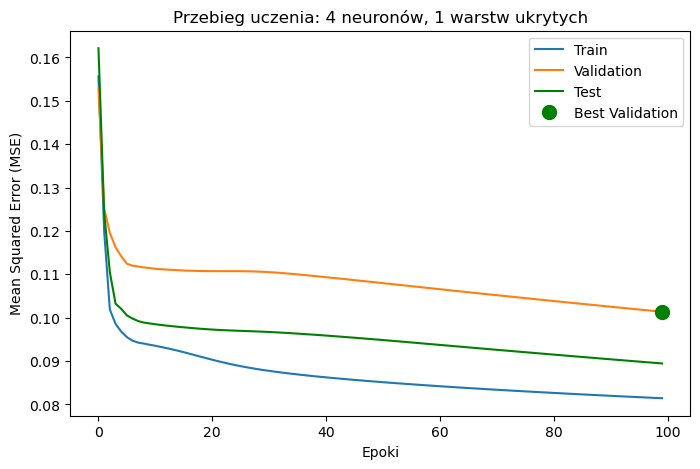

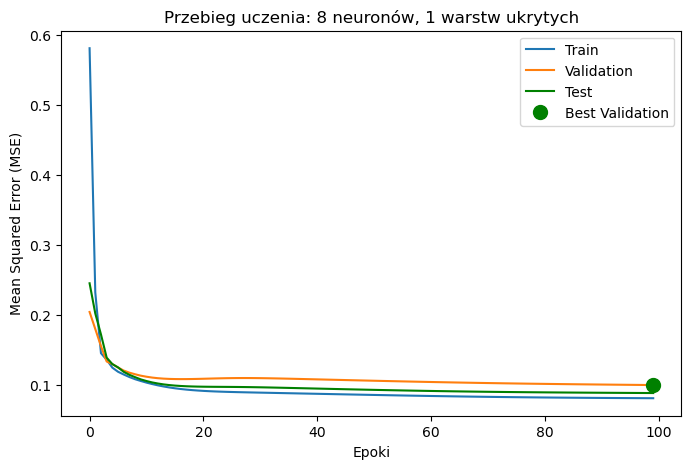

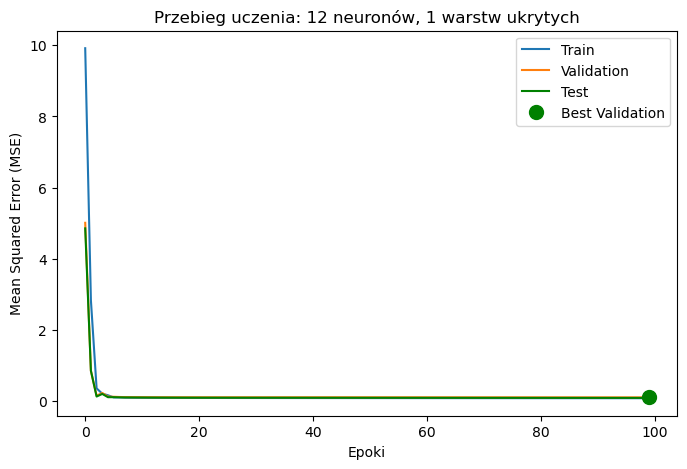

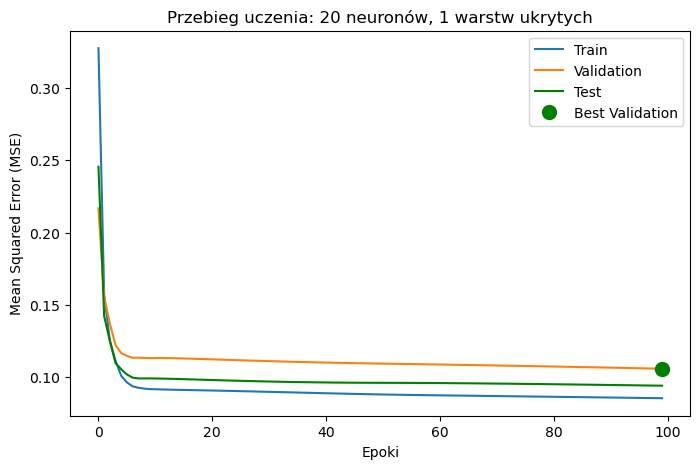

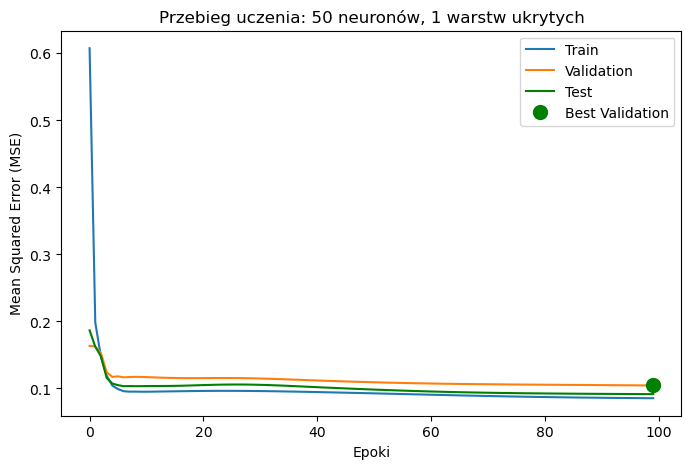

In [11]:
compare_hidden_neurons(
    X_train, y_train, X_val, y_val, X_test, y_test,
    x, y, x_siec, y_siec,
     neurons_list=[ 4, 8, 12, 20, 50],
    n_hidden_layers=1,  
    n_epochs=100
);


- **Wykres 1:**
  - Dla wybranych parametrów (4–50 neuronów w warstwie ukrytej) sieci neuronowe uzyskały bardzo zbliżone wyniki aproksymacji. Nie widać istotnych różnic między poszczególnymi modelami – wszystkie dobrze odwzorowują ogólny przebieg funkcji. Oznacza to, że już niewielka liczba neuronów pozwala na poprawne odwzorowanie zadanej funkcji w tym zadaniu.

- **Kolejne wykresy:**
  - `4 neurony` - Sieć uczy się stabilnie, ale przy tak małej liczbie neuronów model nie jest wystarczająco elastyczny, żeby dobrze odwzorować bardziej złożone wzorce. Błąd walidacyjny (pomarańczowy) jest nieco wyższy niż treningowy, jednak nie obserwujemy silnego przeuczenia. Model ma tendencję do niedouczenia (underfitting).
  - `8 neuronów` - sieć znacznie lepiej radzi sobie z odwzorowaniem danych, błąd szybko spada i stabilizuje się na niskim poziomie. Różnice między zbiorem treningowym i walidacyjnym są niewielkie, nie widać silnego przeuczenia. To już liczba neuronów pozwalająca dobrze nauczyć się zadania aproksymacji.
  - `12 neuronów` Bardzo szybki spadek błędu treningowego, walidacyjnego i testowego do niskich wartości, prawie się pokrywają.
  - `20 neuronów` - Krzywe treningowa, walidacyjna i testowa są nadal niskie i przebiegają blisko siebie. Brak oznak przeuczenia – model jest wystarczająco złożony, ale nie za bardzo.
  - `50 neuronów` - Również tutaj nie obserwujemy przeuczenia – przebiegi są bardzo podobne, a błędy stabilne i niskie. Model mógłby mieć tendencję do przeuczenia, ale liczba danych i regularizacja temu zapobiegają. Prawidłowy przebieg uczenia.
  

W celu pogłębionej analizy działania sieci neuronowej, przeprowadzono eksperyment, w którym zwiększono liczbę warstw ukrytych do dwóch oraz wydłużono czas uczenia do 300 epok. Testowano różne liczby neuronów w każdej warstwie (2, 4, 8, 12, 20, 50), aby sprawdzić, jak dodatkowa warstwa oraz dłuższy proces uczenia wpłyną na jakość aproksymacji oraz przebieg błędów na zbiorach uczącym, walidacyjnym i testowym.

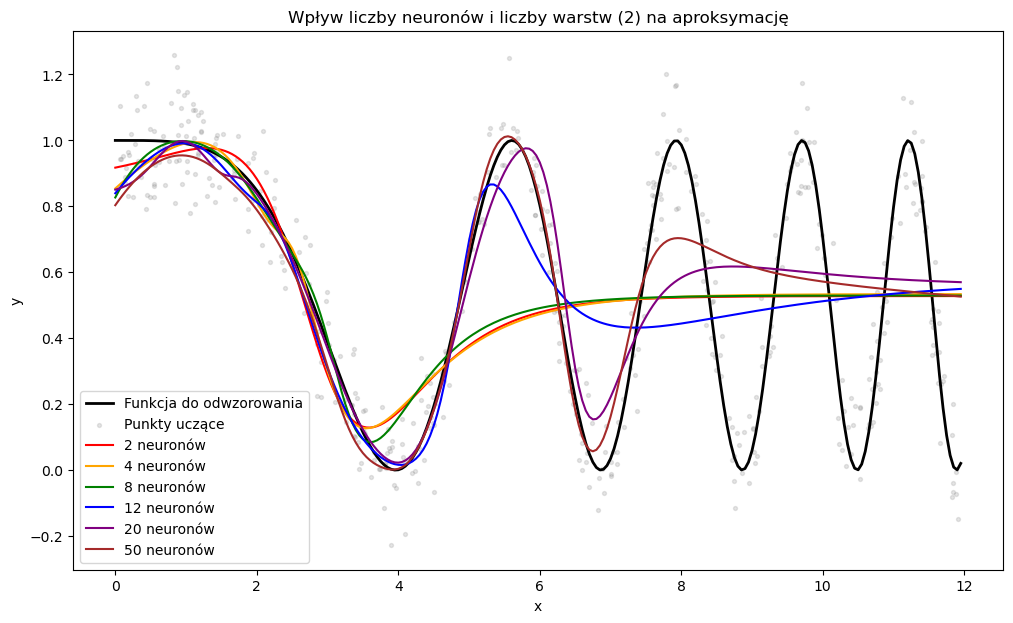

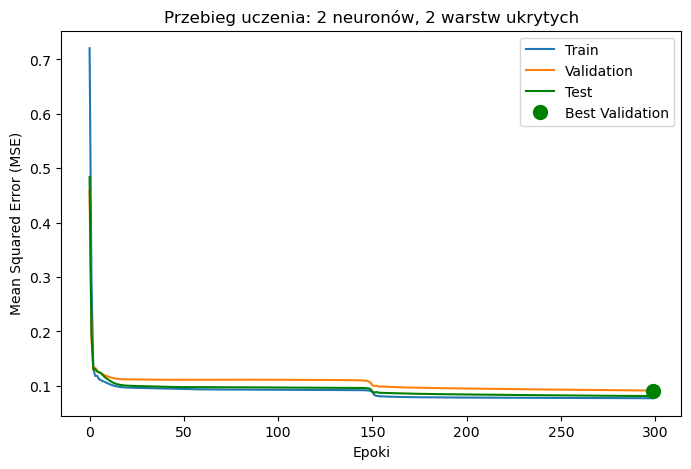

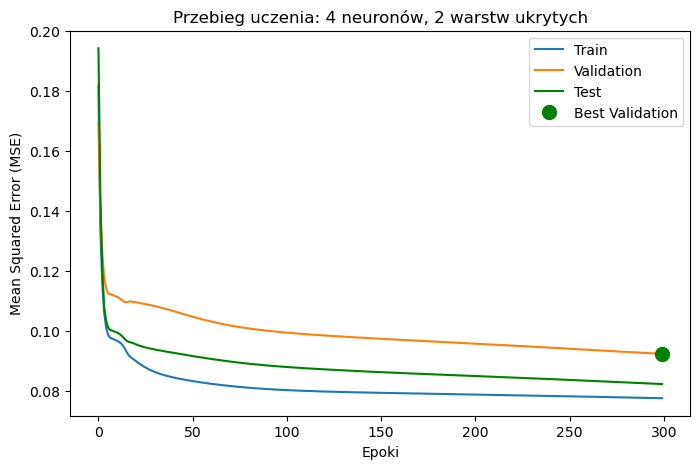

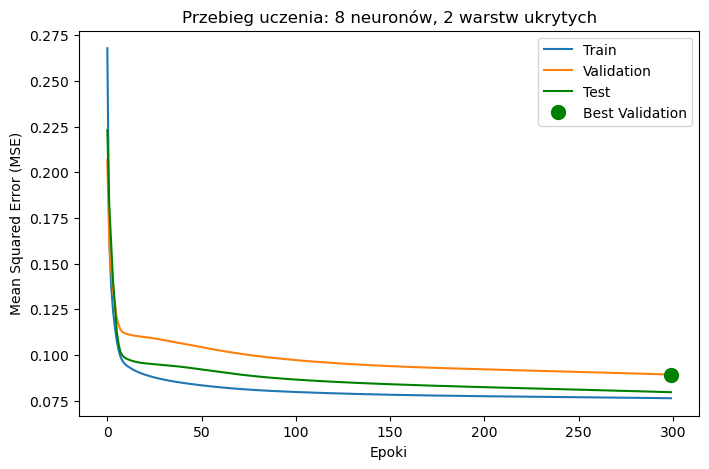

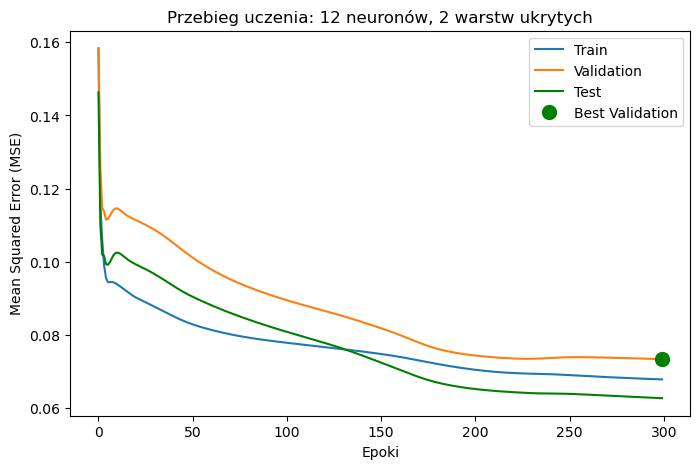

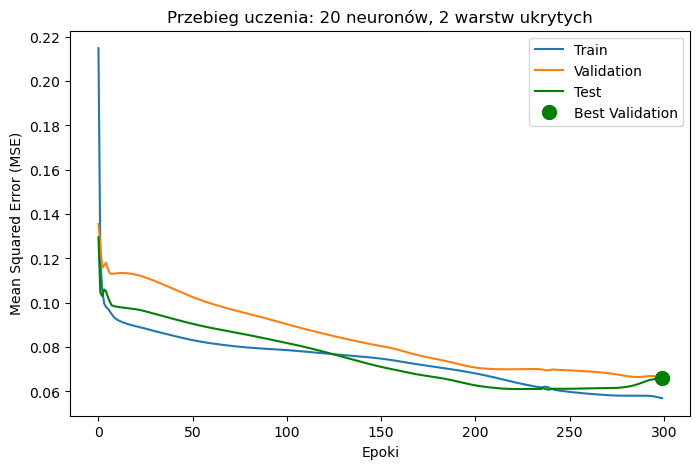

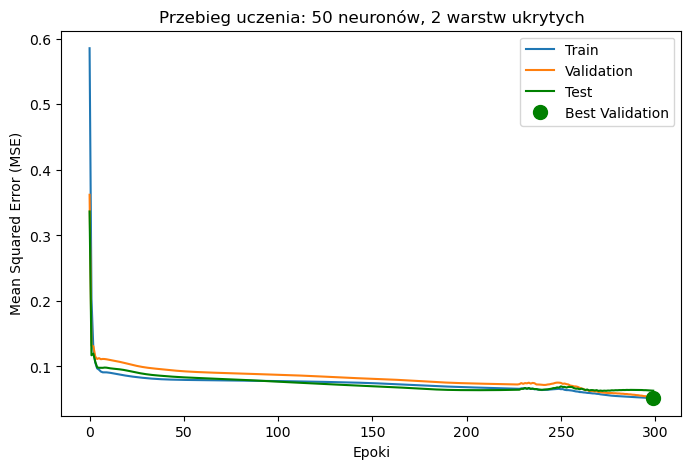

In [13]:
compare_hidden_neurons(
    X_train, y_train, X_val, y_val, X_test, y_test,
    x, y, x_siec, y_siec,
    neurons_list=[2, 4, 8, 12, 20, 50],  
    n_hidden_layers=2,                   
    colors=['red', 'orange', 'green', 'blue', 'purple', 'brown'],
    n_epochs=300
);


- **Wykres 1:**
  - Dodanie drugiej warstwy ukrytej sprawiło, że sieć jest w stanie odwzorować bardziej złożone kształty funkcji, co widać zwłaszcza dla większej liczby neuronów.

  - Zwiększając liczbę neuronów w warstwach ukrytych, sieć potrafi lepiej dopasować się do nieregularności funkcji wzorcowej, ale jednocześnie pojawia się ryzyko przeuczenia (widać oscylacje lub niestabilności aproksymacji dla 20 i 50 neuronów).

  - Dla mniejszych liczby neuronów (2, 4, 8) aproksymacja jest bardziej „wygładzona” i nie nadąża za zmianami funkcji – sieć jest zbyt prosta, by uchwycić złożoność wzorca.

  - Dla bardzo dużej liczby neuronów (np. 50) sieć zaczyna "uczyć się na pamięć" – pojawiają się artefakty, lokalne przeregulowania i nadmierne dopasowanie do szumu.

  - Optymalny efekt osiągany jest zwykle przy umiarkowanej liczbie neuronów – sieć dobrze odwzorowuje funkcję, nie wprowadzając zbędnych zakłóceń.

- **Kolejne wykresy:**
 - `2 neurony` - Wykres pokazuje typowy przypadek niedouczenia (underfitting) – zarówno błąd treningowy, walidacyjny, jak i testowy pozostają relatywnie wysokie przez cały proces uczenia. Sieć jest zbyt prosta, żeby dobrze odwzorować złożoność funkcji.Wykres pokazuje typowy przypadek niedouczenia (underfitting) – zarówno błąd treningowy, walidacyjny, jak i testowy pozostają relatywnie wysokie przez cały proces uczenia. Sieć jest zbyt prosta, żeby dobrze odwzorować złożoność funkcji.
  - `4 neurony` - Błąd walidacyjny i testowy są niższe niż w przypadku 2 neuronów, ale dalej widoczna jest niewielka przewaga błędu walidacyjnego nad treningowym, bez gwałtownego rozjazdu. Uczenie przebiega prawidłowo, sieć coraz lepiej dopasowuje się do danych.
  - `8 neuronów` - Błędy stopniowo maleją, krzywe są do siebie zbliżone. Brak przeuczenia, brak wyraźnego underfittingu – sieć dobrze odwzorowuje dane. Zwiększenie liczby neuronów powoduje, że sieć lepiej dopasowuje się do funkcji celu.
  - `12 neuronów` - Jeszcze lepsze dopasowanie – błąd walidacyjny oraz testowy są niskie i stabilne, krzywe zaczynają się  rozjeżdżają
  - `20 neuronów` - Krzywe błędu treningowego, walidacyjnego i testowego przebiegają bardzo podobnie, krzywe zaczynają się  rozjeżdżają
  - `50 neuronów` -  nie obserwujemy przeuczenia, wszystkie trzy błędy maleją równolegle, błąd testowy nie wzrasta. Świadczy to o tym, że nawet przy większej liczbie neuronów, w tym konkretnym zadaniu, sieć nie zaczyna się przeuczać.
  

W tej części eksperymentu przeanalizowano zachowanie sieci neuronowej o dwóch warstwach ukrytych przy bardzo dużej liczbie neuronów w każdej warstwie (50, 80, 100 neuronów). Dodatkowo zwiększono liczbę epok uczenia do 1000 oraz zmniejszono batch size do 16, aby umożliwić jeszcze dokładniejsze dopasowanie modelu do danych.

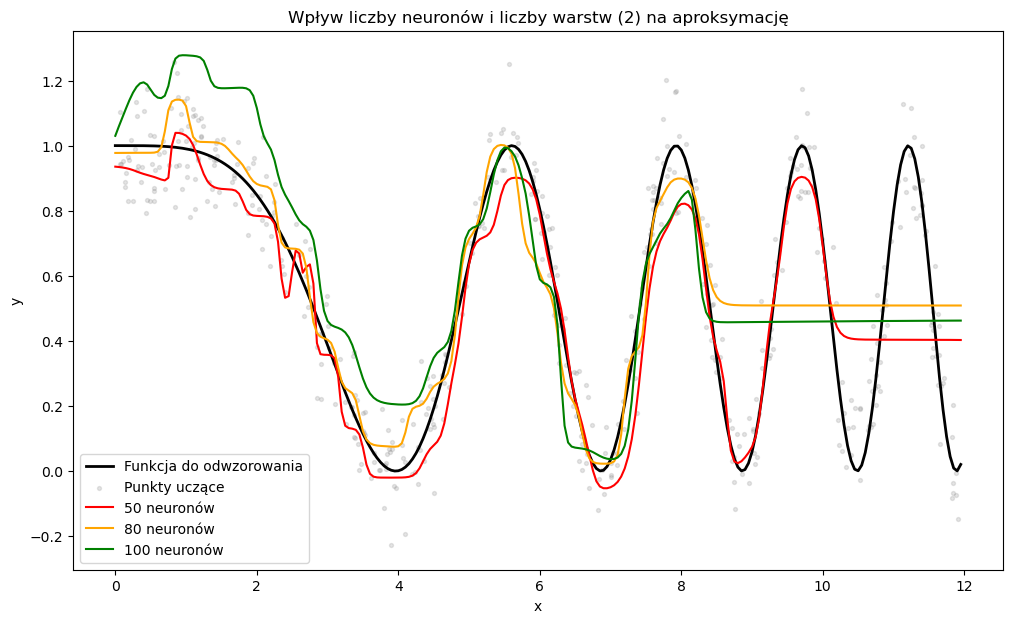

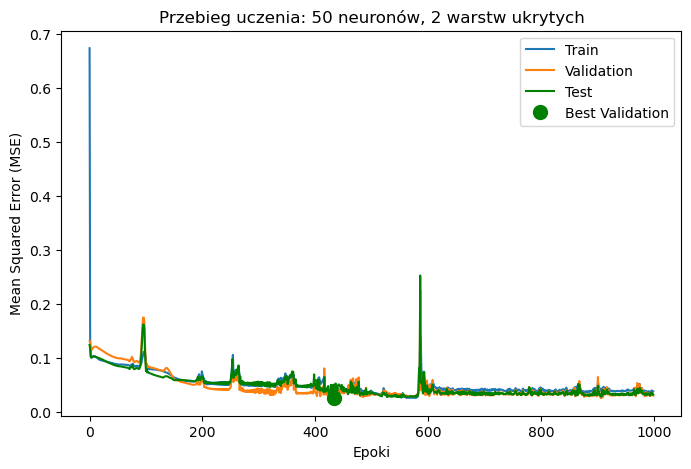

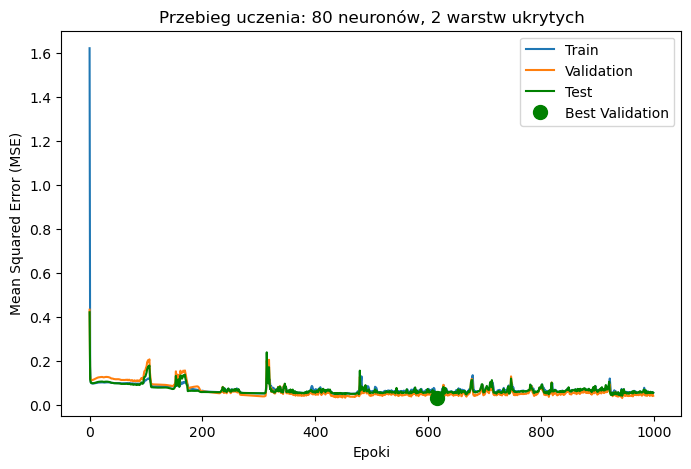

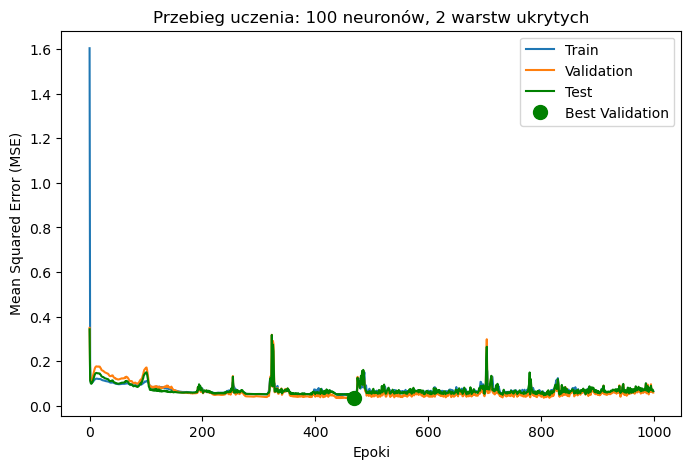

In [14]:
compare_hidden_neurons(
    X_train, y_train, X_val, y_val, X_test, y_test,
    x, y, x_siec, y_siec,
    neurons_list=[50, 80, 100],
    n_hidden_layers=2,
    colors=['red', 'orange', 'green'],
    n_epochs=1000,
    batch_size=16
);

- **Wykres 1:**
  - Zbyt duża liczba neuronów (50, 80, 100) w dwóch warstwach ukrytych prowadzi do przeuczenia modelu (overfittingu). Sieci próbują bardzo dokładnie odwzorować nawet drobne fluktuacje i szum w danych uczących, co skutkuje powstawaniem nienaturalnych oscylacji i "przesterowań" na wykresie.
  - Funkcje aproksymujące (czerwony, pomarańczowy, zielony wykres) stają się nieregularne i odbiegają od rzeczywistej funkcji celu (czarna linia), szczególnie w miejscach, gdzie brak jest punktów uczących lub występuje większy szum.
  - Model traci zdolność generalizacji – zamiast wygładzać dane i odwzorowywać ogólny trend, sieć „zapamiętuje” konkretne przypadki z danych treningowych.



- **Kolejne wykresy:**
 - Wzrost liczby neuronów i złożoności sieci dla tej liczby danych prowadzi do niestabilności procesu uczenia oraz ryzyka przeuczenia. Najlepsze wyniki (najbardziej stabilne) uzyskuje się dla mniejszych sieci – duża sieć wymagałaby znacznie większej liczby danych oraz dodatkowych mechanizmów regularyzujący

### Analiza wpływu liczby próbek uczących (ile_danych)

W tej części eksperymentu analizuję, jak liczba próbek uczących wpływa na efektywność i jakość uczenia sieci neuronowej. W celu wyizolowania wpływu liczebności zbioru uczącego, liczba neuronów w warstwie ukrytej została ustalona na optymalnym poziomie (12 neuronów). Dla różnych rozmiarów zbioru uczącego (od 10 do 1000 próbek) przeprowadzam proces uczenia i analizuję przebieg błędów treningowych, walidacyjnych oraz testowych.

Celem eksperymentu jest zobrazowanie, jak zbyt mała liczba próbek prowadzi do niedouczenia i niestabilnych wyników, a także jak zwiększanie liczebności zbioru wpływa na poprawę jakości generalizacji sieci.


Liczba próbek uczących: 10


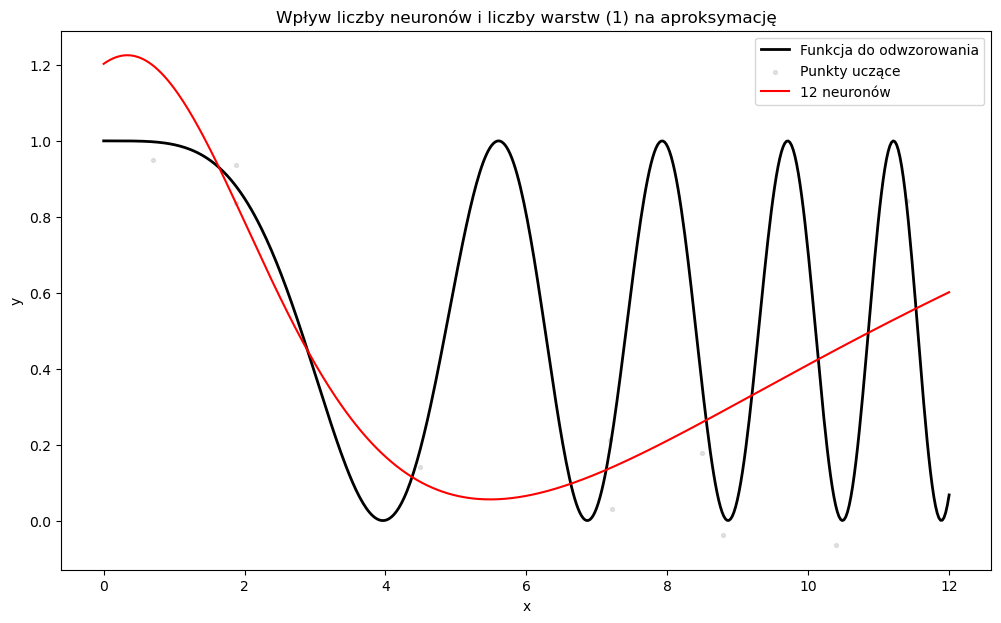

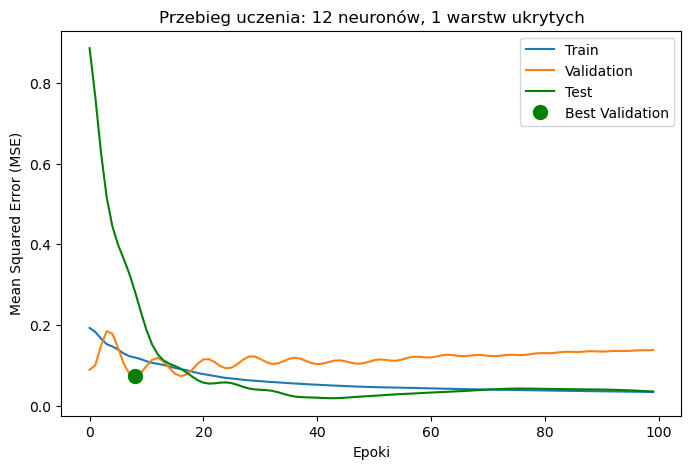


Liczba próbek uczących: 100


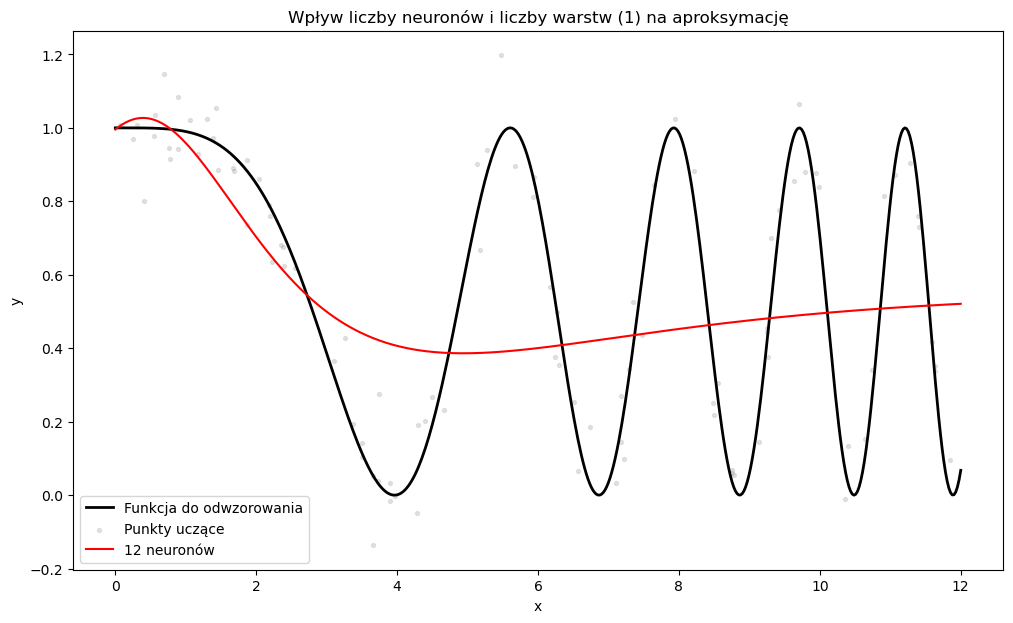

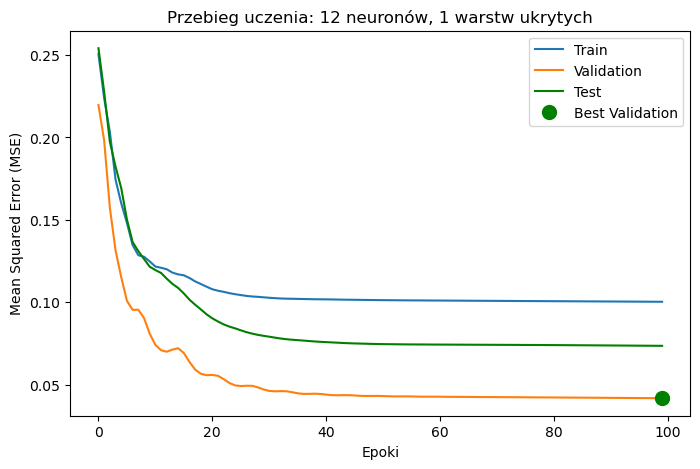


Liczba próbek uczących: 200


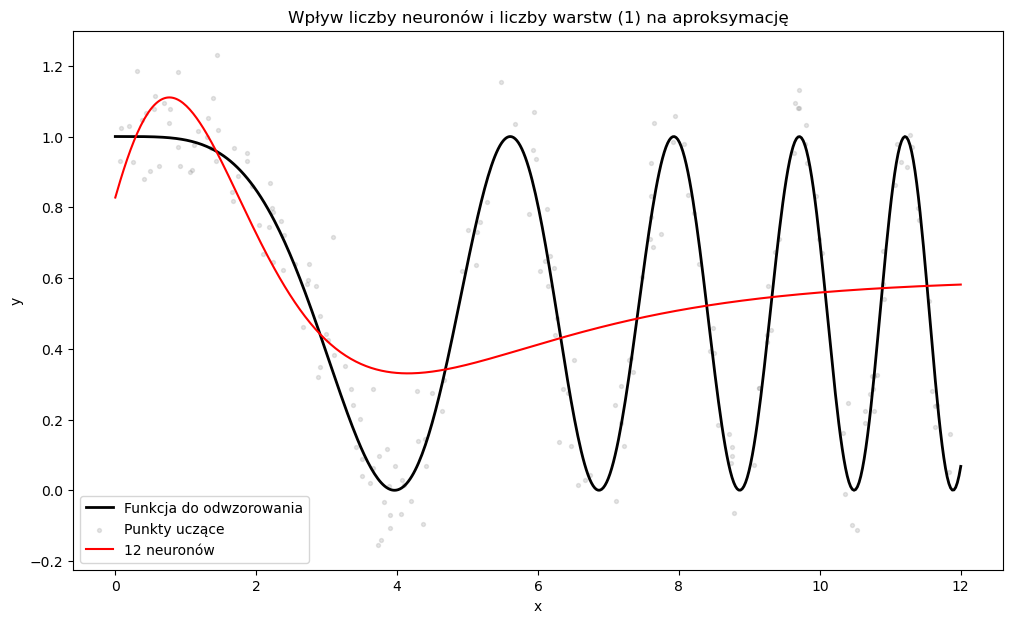

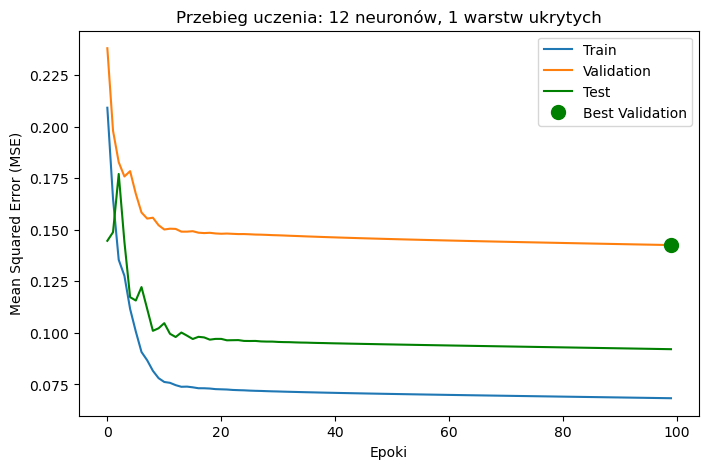


Liczba próbek uczących: 500


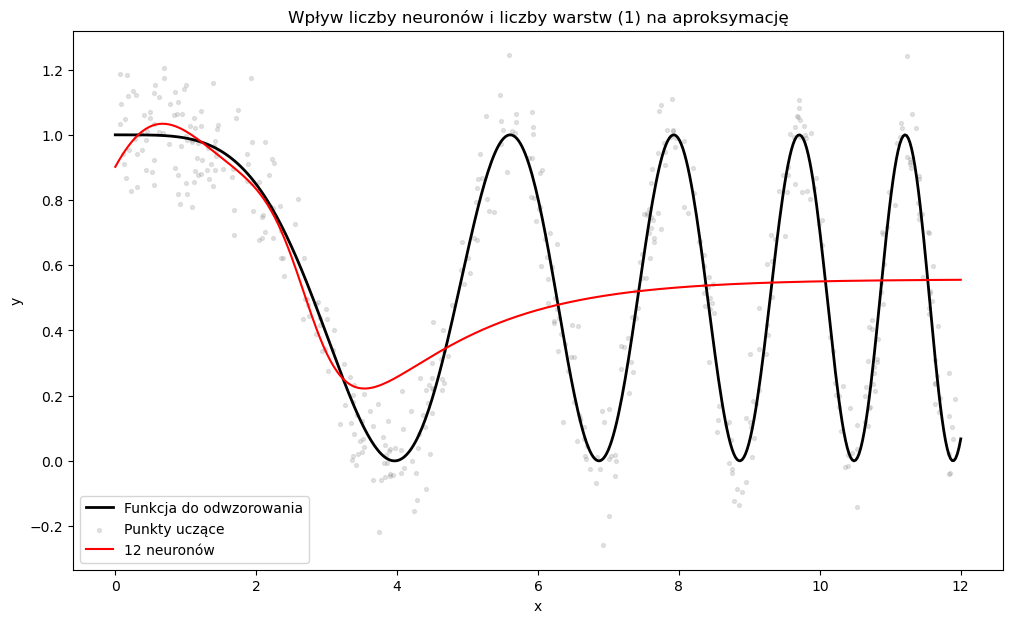

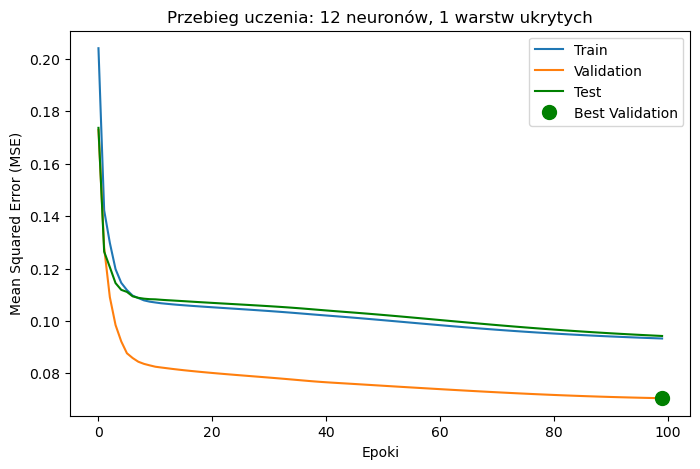

In [17]:
sample_sizes = [10,  100, 200, 500]
neurons_list = [12]  # optymalna liczba neuronów, żeby wyizolować wpływ próbek

for ile_danych in sample_sizes:
    np.random.seed(42)
    x_siec = np.sort(np.random.uniform(0, 12, ile_danych))
    y_siec = 0.5 * np.cos(0.2 * x_siec**2) + 0.5 + np.random.normal(0, 0.1, ile_danych)

    # Podział na zbiory (np. 60% train, 20% val, 20% test)
    X_train, X_rest, y_train, y_rest = train_test_split(x_siec, y_siec, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

    X_train = X_train.reshape(-1, 1)
    X_val = X_val.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    x = np.linspace(0, 12, 500).reshape(-1, 1)
    y = 0.5 * np.cos(0.2 * x.flatten()**2) + 0.5

    print(f"\nLiczba próbek uczących: {ile_danych}")
    compare_hidden_neurons(
        X_train, y_train, X_val, y_val, X_test, y_test,
        x, y, x_siec, y_siec,
        neurons_list=neurons_list,
        n_hidden_layers=1,
        n_epochs=100,
        show=True
    );


- Wnioski dla liczby próbek uczących: 10
  - Sieć neuronowa nie jest w stanie dobrze odwzorować funkcji celu – uzyskana aproksymacja (czerwona linia) znacznie odbiega od oryginalnej funkcji (czarna linia). Wynika to z bardzo małej liczby punktów uczących, które nie pokrywają dobrze zakresu funkcji i nie pozwalają nauczyć się złożonych zależności.

  - Przebieg uczenia (wykres MSE): Zarówno błąd walidacyjny, jak i testowy oraz treningowy są początkowo wysokie i wykazują dużą niestabilność (widoczne są skoki i oscylacje). Świadczy to o niedouczeniu sieci (underfitting) – sieć nie ma wystarczającej ilości danych, by nauczyć się charakterystycznych cech funkcji i generalizować na nowe dane.
 
- Wnioski dla liczby próbek uczących: 100
  - Sieć neuronowa z 12 neuronami w warstwie ukrytej nadal nie jest w stanie dobrze odwzorować złożonego przebiegu funkcji celu – aproksymacja (czerwona linia) jest wyraźnie wygładzona i nie odwzorowuje szybkozmiennych fragmentów oryginalnej funkcji (czarna linia). Jednak jakość dopasowania jest zauważalnie lepsza niż dla 10 próbek.

  - Przebieg uczenia (wykres MSE): Błędy na zbiorze treningowym, walidacyjnym i testowym systematycznie maleją i stabilizują się na niskim poziomie. Brak wyraźnych oscylacji czy dużych różnic między błędem treningowym a walidacyjnym, co oznacza brak przeuczenia, ale też wciąż widoczne jest niedouczenie (underfitting).
 
- Wnioski dla liczby próbek uczących: 200
  - Sieć z 12 neuronami coraz lepiej odwzorowuje ogólny kształt funkcji celu. Linia aproksymacji (czerwona) jest bliżej rzeczywistego przebiegu funkcji (czarna), choć nadal gubi niektóre złożone fragmenty i detale. Zauważalnie poprawia się jednak zgodność w obszarach o wolniejszych zmianach.

  - Przebieg uczenia (MSE): Wszystkie błędy – treningowy, walidacyjny i testowy – obniżają się i stabilizują na coraz niższym poziomie. Przebiegi są gładkie, nie występują znaczne rozbieżności między błędami, co świadczy o braku przeuczenia i coraz lepszej generalizacji modelu.
 
- Wnioski dla liczby próbek uczących: 500
  - Sieć coraz lepiej odwzorowuje kształt funkcji celu, ale dalej uproszcza bardziej złożone fragmenty.

  - Błędy treningu, walidacji i testu są niskie i stabilne – nie widać przeuczenia.

### Analiza wpływu liczby epok (n_epochs) na efekt przeuczenia

W poniższym eksperymencie analizujemy, jak długość procesu uczenia (liczba epok) wpływa na skuteczność uczenia sieci neuronowej oraz ryzyko przeuczenia. Przy stałej liczbie próbek uczących (100) i stałej architekturze sieci (12 neuronów w jednej warstwie), testujemy różne wartości liczby epok: 10, 50, 100, 300 i 500. Wyniki dla każdego przebiegu pokazują zarówno wykres aproksymacji, jak i przebieg błędu MSE dla zbioru uczącego, walidacyjnego i testowego.


Liczba epok: 10


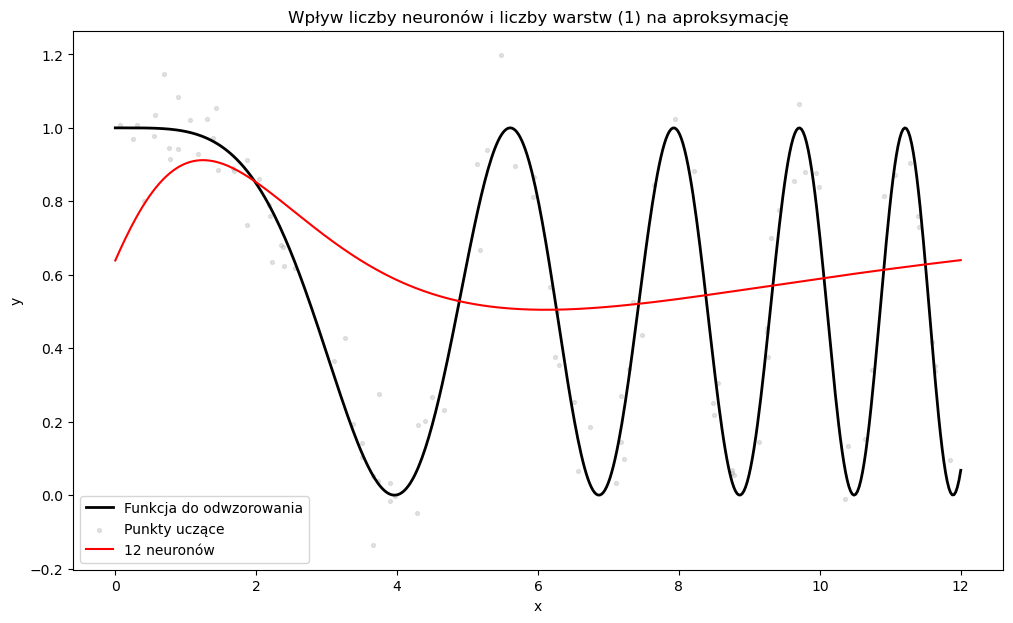

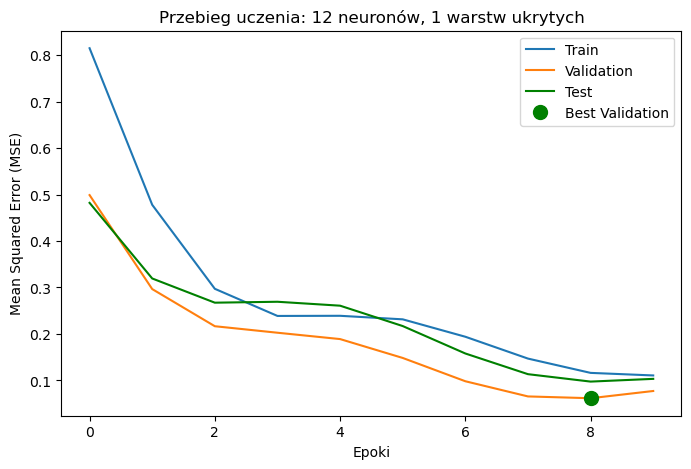


Liczba epok: 50


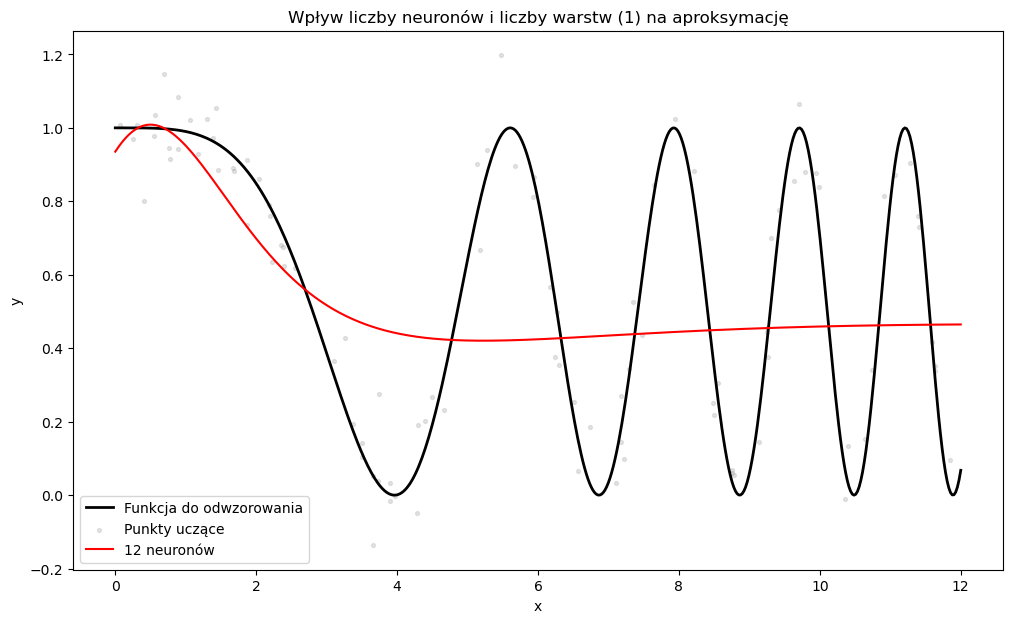

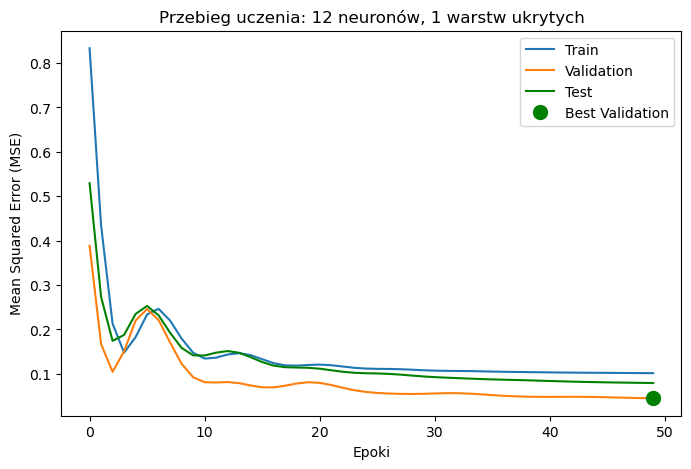


Liczba epok: 100


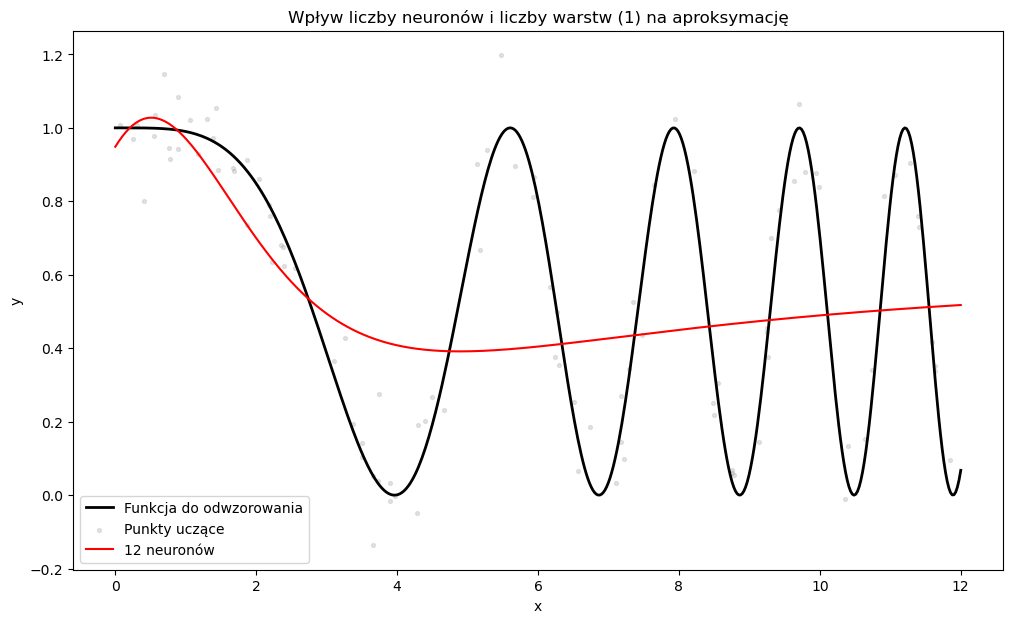

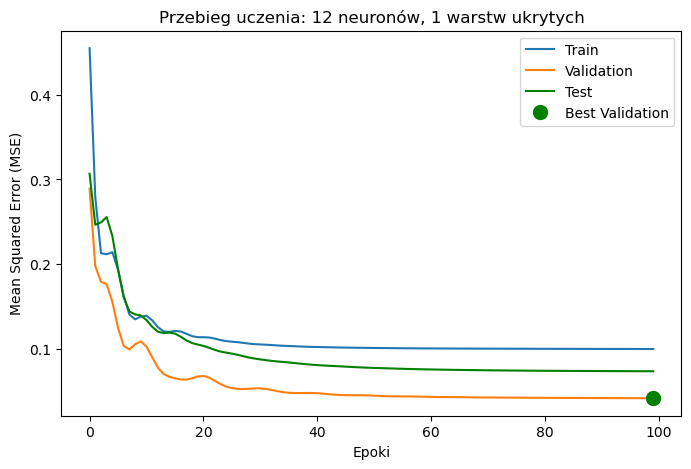


Liczba epok: 300


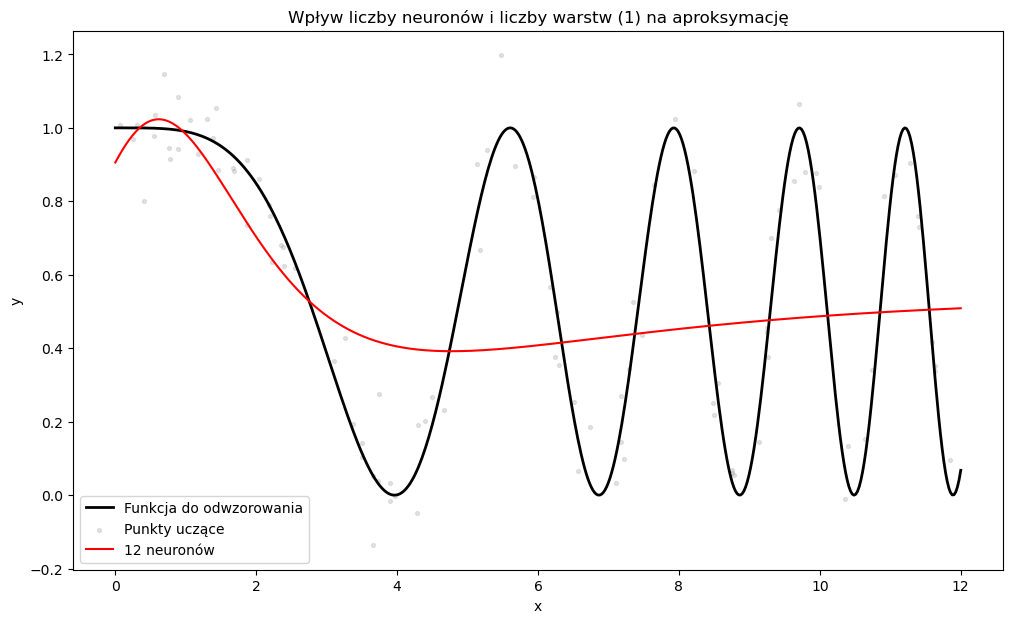

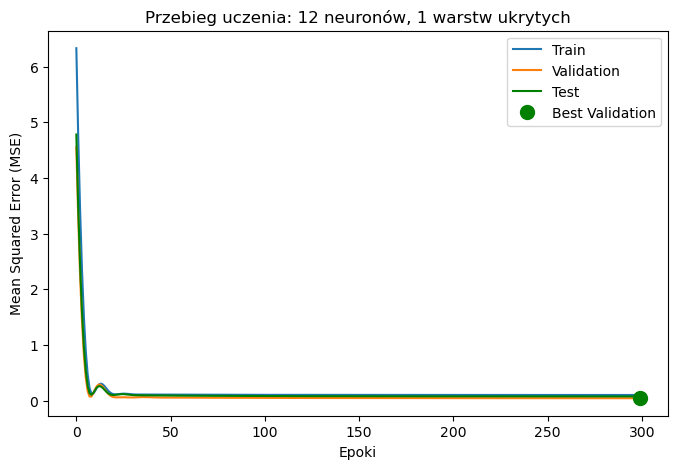


Liczba epok: 500


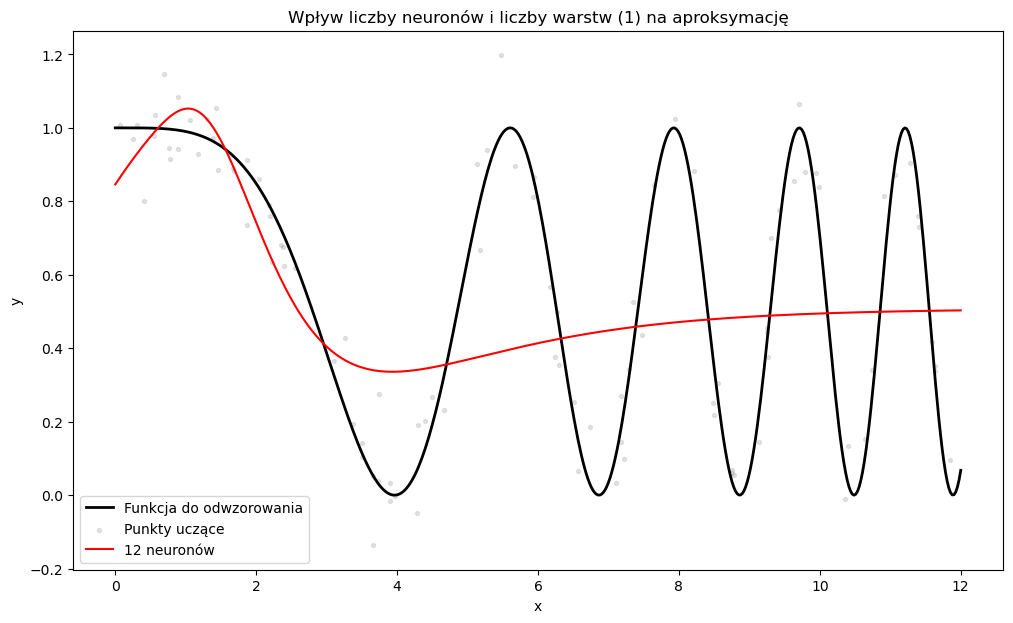

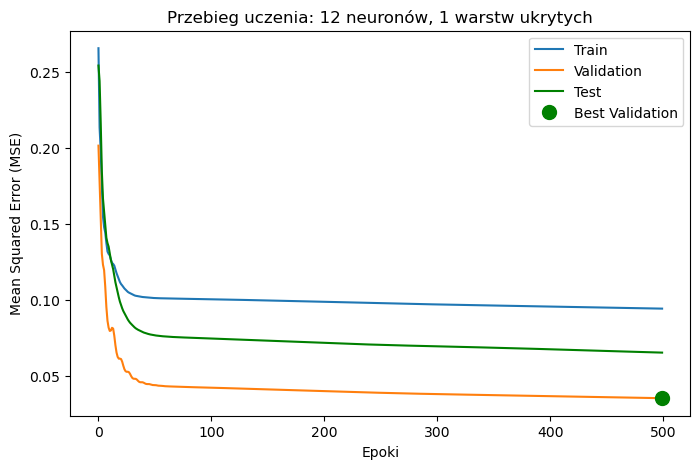

In [16]:
epochs_list = [10, 50, 100, 300, 500]
ile_danych = 100  
neurons_list = [12]

np.random.seed(42)
x_siec = np.sort(np.random.uniform(0, 12, ile_danych))
y_siec = 0.5 * np.cos(0.2 * x_siec**2) + 0.5 + np.random.normal(0, 0.1, ile_danych)

X_train, X_rest, y_train, y_rest = train_test_split(x_siec, y_siec, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

x = np.linspace(0, 12, 500).reshape(-1, 1)
y = 0.5 * np.cos(0.2 * x.flatten()**2) + 0.5

for n_epochs in epochs_list:
    print(f"\nLiczba epok: {n_epochs}")
    compare_hidden_neurons(
        X_train, y_train, X_val, y_val, X_test, y_test,
        x, y, x_siec, y_siec,
        neurons_list=neurons_list,
        n_hidden_layers=1,
        n_epochs=n_epochs,
        show=True
    );


Optymalna liczba epok pozwala sieci wystarczająco nauczyć się wzorca bez niepotrzebnego przedłużania treningu. Zbyt mała liczba epok prowadzi do niedouczenia, natomiast zbyt duża nie daje już poprawy (dla tego zadania nie pojawiło się przeuczenie). Najlepsze rezultaty daje obserwowanie przebiegu błędów i zakończenie nauki w momencie ich stabilizacji (można wykorzystać mechanizm Early Stopping).